# Implementation of SSVD biclustering algorithm

Rumo Zhang, Xige Huang

## Abstract

Sparse singular value decomposition (SSVD) is proposed as a SVD-based tool for biclustering or identifying interpretable row-column associations of the data matrices, especially for real-world data with high-dimension and low sample size (DHLSS). Specifically, SSVD provides low-rank, checkerboard structuered matrix approximation to the data through obtaining the sparse (contaning many zero entries) left- and right-singular vectors.  The iterative SSVD algorithm utilizes the connection between SSVD and penalized regression using BIC. Optimization of the algorithm is conducted with the use of (**?????**). A simulated data set, the lung cancer data introduced in the research paper, and a data set of (**?????**) are used to illustrate the performance of the SSVD algorithm, along with comparative analysis with competing algorithms of (**?????**).

**Key words:  Biclustering; SSVD; Adaptive Lasso penalty; ???(need at least one more)** 

## Background

This project is a python realization of the algorithm proposed in _Biclustering via Sparse Singular Value Decomposition_ by Lee, Shen, Huang, and Marron.

High-dimension and low sample size (DHLSS) data proposed a lot of challenge in statistical prediction in many fields. Among some of the useful tools when dealing with high-dimensional data, biclustring methods refers to a collection of unsupervised learning tools that simultaneously clusters the sets of samples (rows) and sets of variables (columns) in the data matrices to identify groups that are significantly associated. Lee, Shen, Huang, and Marron introduced SSVD as a new tool for biclustering. SSVD biclustering can be applied to fields include text mining, gene expression analysis, and numerous other biomedical analyzing tasks to detect important associations among the clusters.

In their research paper, Lee, Shen, Huang, and Marron utilizes special structure of SSVD to make the algorithm more efficient than the prior ones. Specifically, they suggest that selecting the penalty parameters in the adaptive Lasso regressions is equivalent to selecting the degrees of sparsity in the singular vectors; the sparsity implies selection of relevant rows and columns when forming a low rank approximation to the data matrix. 

In addition, SSVD can be more rigorous as a biclustering tool comparing to others such as SVD and PCA. (**?????**) As shown later in the comparative analysis section, SSVD has obvious advantages of detecting sparse structure when compared with SVD, and imposing sparse structure in both the penalized and unpenalized direction when comparing to the PCA methods.

## The Algorithm

### Overview

Let X be a n × d data matrix whose rows represent observations and columns represent variables. With the SVD decomposition of X, the first $K \leq r$ rank-one matrices in the summation is the closest rank-K approximation to X:

$$
\mathbf{X} = \mathbf{U D V}^{T}=\sum_{k=1}^{r} s_{k} \boldsymbol{u}_{k} \boldsymbol{v}_{k}^{T}, \quad \mathbf{X}^{(K)} \equiv \sum_{k=1}^{K} s_{k} \boldsymbol{u}_{k} \boldsymbol{v}_{k}^{T}
$$

The proposed SSVD algorithm is based on the idea above, but with sparsity-inducing penalities to make $u_k$ and $v_k$ sparse. The rank-one matrix $s_k u_k v_k^T$, with a checkerboard structure, is referred to as the first SSVD layer, and the sum of the first m layers provides the best sparse rank-m approximation to the data matrices. For the main purpose of this project and simplification, we will only describe the algorithm to compute SSVD, more details of the connection with variable selection for penalized regressions are presented in the original paper.

### The iterative algorithm to compute SSVD layer

**Step 0**: Choose non-negative parameters $\gamma_1$ and $\gamma_2$

**Step 1**: Obtain the SVD composition of the n x d data matrix $\mathbf{X}$, denote by 
$
\mathbf{X} = \mathbf{u} s \mathbf{v}^T
$

**Step 2**: 
1. Calculate $\boldsymbol{w}_{2}$ by
$$
\boldsymbol{w}_{2} \equiv\left(w_{2,1}, \ldots, w_{2, d}\right)^{T}=|\hat{\tilde{v}}|^{-\gamma_{2}} = |\mathbf{X}^T u|^{-\gamma_{2}}
$$
Obtain $\hat{\sigma^2}$, the OLS estimate of the error variance from the penalized regression
$$
\left\|\mathbf{X}-\boldsymbol{u} \tilde{\boldsymbol{v}}^{T}\right\|_{F}^{2}+ s \sum_{j=1}^{d} w_{2, j}\left|v_{j}\right|
$$
Calculate $\lambda_v$ from $\lambda_v = \underset{\lambda_v}{argmin}\operatorname{BIC}\left(\lambda_{v}\right)$, where
$$\operatorname{BIC}\left(\lambda_{v}\right)=\frac{\|\mathbf{Y}-\hat{\mathbf{Y}}\|^{2}}{n d \cdot \hat{\sigma}^{2}}+\frac{\log (n d)}{n d} \hat{d f}\left(\lambda_{v}\right)
$$
2. Set $\tilde{v}_{j}=\operatorname{sign}\left\{\left(\mathbf{X}^{T} \boldsymbol{u}\right)_{j}\right\}\left(\left|\left(\mathbf{X}^{T} \boldsymbol{u}\right)_{j}\right|-\lambda_{v} w_{2, j} /2 \right)_+$, with $\lambda_v$ from step2.1, $j = 1, \dots, d$
3. Let $\tilde{v} = \left(\tilde{v}_{1}, \ldots, \tilde{v}_{d}\right)^{T}$, and $\boldsymbol{v}_{\text {new }}=\tilde{\boldsymbol{v}} / \|\tilde{\boldsymbol{v}}\|$

Note:
- $\mathbf{Y}=\left(\boldsymbol{x}_{1}^{T}, \ldots, \boldsymbol{x}_{d}^{T}\right)^{T} \in R^{n d}$ with $x_j$ being the jth column of $\mathbf{X}$
- $\hat{\tilde{v}}$ is the OLS estimate of $\tilde{v}$

**Step 3**: 
1. Calculate $\boldsymbol{w}_{1}$ by
$$
\boldsymbol{w}_{1} \equiv\left(w_{1,1}, \ldots, w_{1, n}\right)^{T}=|\hat{\tilde{u}}|^{-\gamma_{1}} = |\mathbf{X}v|^{-\gamma_{2}}
$$
Obtain $\hat{\sigma^2}$, the OLS estimate of the error variance from the penalized regression
$$
\left\|\mathbf{X}-\tilde{\boldsymbol{u}} \boldsymbol{v}^{T}\right\|_{F}^{2}+ s \sum_{i=1}^{n} w_{1, i}\left|u_{i}\right|
$$
Calculate $\lambda_u$ from $\lambda_u = \underset{\lambda_u}{argmin}\operatorname{BIC}\left(\lambda_{u}\right)$, where
$$\operatorname{BIC}\left(\lambda_{u}\right)=\frac{\|\mathbf{Z}-\hat{\mathbf{Z}}\|^{2}}{n d \cdot \hat{\sigma}^{2}}+\frac{\log (n d)}{n d} \hat{d f}\left(\lambda_{u}\right)
$$
2. Set $\tilde{u}_{i}=\operatorname{sign}\left\{\left(\mathbf{X} \boldsymbol{v}_{\text{new}}\right)_{i}\right\}\left(\left|\left(\mathbf{X} \boldsymbol{v}_{\text{new}}\right)_{j}\right|-\lambda_{v} w_{u, i} /2 \right)_+$, with $\lambda_u$ from step3.1, $i = 1, \dots, n$
3. Let $\tilde{u} = \left(\tilde{u}_{1}, \ldots, \tilde{u}_{n}\right)^{T}$, and $\boldsymbol{u}_{\text {new }}=\tilde{\boldsymbol{u}} / \|\tilde{\boldsymbol{u}}\|$

Note:
- $\mathbf{Z}=\left(\boldsymbol{x}_{(1)}, \ldots, \boldsymbol{x}_{(n)}\right)^{T} \in R^{n d}$ with $x_i^T$ being the ith row of $\mathbf{X}$
- $\hat{\tilde{u}}$ is the OLS estimate of $\tilde{u}$

**Step 4**:
Repeat step 2 and step 3 with $\boldsymbol{u} = \boldsymbol{u}_{\text{new}}$, $\boldsymbol{v} = \boldsymbol{v}_{\text{new}}$ until convergence

**Step 5**: Obtain the $\boldsymbol{u}$, $\boldsymbol{v}$, s = $\boldsymbol{u}^T\mathbf{X}\boldsymbol{v}$ at convergence

Subsequent layers can be extracted sequentially from the residual matrices after removing the preceding layers.
For our package, we choose to use $\gamma_1 = \gamma_2 = 2$ suggested by Zou (2006) as an default for the function `SSVD_single`.

## Optimization of the algorithm

## Application to simulated data sets

In [1]:
import scipy.linalg as la
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.decomposition import SparsePCA
from SSVD.functions import SSVD_single
from SSVD.functions import SSVD_multi_layer

#### Rank 1 simulation

In order to closely examine the performance of our algorithm, we decided to carry out simulation studies. In this section, we will start by repeating a rank-1 simulation study suggested by Lee et al. (2010). In this designed simulation dataset, the target matrix $X$ has the dimension of $100 \times 50$. In a rank-1 approximation by our SSVD algorithm, the corresponding vectors $u$ and $v$ are designed to have 25 and 16 nonzero entries, respectively. The scaling eigenvalue associated with this case is set to be $50$. The final dataset also has error terms from a standard normal distribution added. And the entire data generating process is repeated 100 times. 

Ideally, we expect our algorithm to correctly detect the zero and nonzero entries from the original dataset. In this case, we collected the following statistics to evaluate its performance: number of zero entries, number of correctly specified zero entries and number of correctly specified nonzero entries. 

In [2]:
def rank1_approx(M = 100):
    """Carry out a rank-1 approximation simulation study"""
    
    u_tilde = np.concatenate((np.arange(3, 11)[::-1],
                          np.ones(17) * 2,
                          np.zeros(75)))
    u = u_tilde / np.linalg.norm(u_tilde)
    v_tilde = np.concatenate((np.array([10, -10, 8, -8, 5, -5]), 
                              np.ones(5) * 3,
                              np.ones(5) * (-3), 
                              np.zeros(34)))
    v = v_tilde / np.linalg.norm(v_tilde)
    s = 50
    x_sim_rank1 = s * u.reshape((-1, 1)) @ v.reshape((1, -1)) 
    
    v_nonzero_ind = np.where(v != 0)
    v_zero_ind = np.where(v == 0)
    u_nonzero_ind = np.where(u != 0)
    u_zero_ind = np.where(u == 0)
    
    v_zeros = np.zeros(M)
    v_true_zeros = np.zeros(M)
    v_true_nonzeros = np.zeros(M)
    
    u_zeros = np.zeros(M)
    u_true_zeros = np.zeros(M)
    u_true_nonzeros = np.zeros(M)
    
    
    for i in range(M):
        noise = np.random.normal(size = (x_sim_rank1.shape))
        u_appr, v_appr, iters = SSVD_single(x_sim_rank1 + noise)
        v_zeros[i] = np.sum(v_appr == 0)
        u_zeros[i] = np.sum(u_appr == 0)
        v_true_zeros[i] = np.sum(v_appr[v_zero_ind] == 0)
        u_true_zeros[i] = np.sum(u_appr[u_zero_ind] == 0)
        v_true_nonzeros[i] = np.sum(v_appr[v_nonzero_ind] != 0)
        u_true_nonzeros[i] = np.sum(u_appr[u_nonzero_ind] != 0)
        
    return np.array([v_zeros, v_true_zeros, v_true_nonzeros, u_zeros, u_true_zeros, u_true_nonzeros])


In [3]:
result = rank1_approx()
result = np.mean(result, axis = 1)

In [4]:
print("Average of correctly specified zero entries on u is", result[4] / result[3])
print("Average of correctly specified nonzero entries on u is", result[5] / 25)
print("Average of correctly specified zero entries on v is", result[1] / result[0])
print("Average of correctly specified nonzero entries on v is", result[2] / 16)

Average of correctly specified zero entries on u is 0.9979641693811074
Average of correctly specified nonzero entries on u is 0.9940000000000001
Average of correctly specified zero entries on v is 1.0
Average of correctly specified nonzero entries on v is 1.0


As we can read from our result, the simulation study on our rank-1 approximation is fairly accurate, with the biclustering identification rate close to 100% on both vector $u$ and $v$. Comparing with the table in Lee et al. (2010), we can observe that results are close. 

#### Rank-3 simulation

Continuing from the rank-1 approximation setup, we also want to generate a dataset with rank-3. In this simulation, we choose to use a dataset that is moderately sparse, and examine the performance of algorithm on each layer. 

In [4]:
A = np.random.poisson(1, (15,20)) * np.random.randint(0, 10, (15,20))
pd.DataFrame(A).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,0,0,0,1,15,0,9,8,0,10,16,9,4,15,1,6,3,16,0
1,0,0,9,0,8,0,1,0,0,2,0,0,4,0,6,0,0,5,1,1
2,0,0,7,16,0,18,8,2,0,0,16,0,0,0,5,0,8,0,15,0
3,12,5,0,7,1,16,0,2,6,0,0,6,0,0,0,27,1,0,0,0
4,6,4,9,0,0,8,0,0,6,4,1,8,2,0,1,5,0,0,6,0


In [5]:
SSVD_multi_layer(A, 3)

/Users/huangxe/STA663-SSVD/SSVD/functions.py:30: RuntimeWarning: divide by zero encountered in power
  omega_2 = np.abs(Xt_U) ** (-gamma2)
/Users/huangxe/STA663-SSVD/SSVD/functions.py:40: RuntimeWarning: invalid value encountered in true_divide
  term1 = Xt_U / abs(Xt_U)
/Users/huangxe/STA663-SSVD/SSVD/functions.py:41: RuntimeWarning: invalid value encountered in multiply
  term2 = abs(Xt_U) - l * omega_2 / 2
/Users/huangxe/STA663-SSVD/SSVD/functions.py:42: RuntimeWarning: invalid value encountered in multiply
  term2 *= term2 >= 0


(array([[-0.37348903,  0.        , -0.        ],
        [-0.07533484,  0.        ,  0.        ],
        [-0.29597316,  0.        , -0.        ],
        [-0.19506973,  1.        , -0.        ],
        [-0.14840065, -0.        , -0.        ],
        [-0.13147207, -0.        ,  0.        ],
        [-0.36891369,  0.        , -0.93408389],
        [-0.17155527,  0.        ,  0.        ],
        [-0.29388226, -0.        , -0.        ],
        [-0.27304888, -0.        ,  0.35705363],
        [-0.18169654, -0.        , -0.        ],
        [-0.14257872,  0.        ,  0.        ],
        [-0.38602404,  0.        ,  0.        ],
        [-0.13909063, -0.        , -0.        ],
        [-0.37645259,  0.        ,  0.        ]]),
 array([[-0.15878239, -0.        , -0.        ],
        [-0.05616876, -0.        ,  0.        ],
        [-0.07145373,  0.        ,  0.        ],
        [-0.19249815, -0.        ,  0.        ],
        [-0.08983538,  0.        , -0.57459756],
        [-0.305492

As we can see from our result, when the target dataset is moderately sparse, the first layer of our SSVD algorithm does not perform biclustering. On the other hand, the second and the third layer have more zero entries and bicluster the dataset. 

## Applications to real-world data set

### The lung cancer data

After some simulation studies on our algorithm, we want to apply it to real datasets to check its performance. Firstly, we choose the Lung Cancer dataset used in the paper Lee et al. (2010). The dataset contains 12625 rows and 56 columns, representing gene expressions and subjects, respectively. Notice from the heatmap below that the raw gene data appear to be unorganized. Our expected outcome of applying our SSVD algorithm to this dataset is to find clusters in the gene subjects.

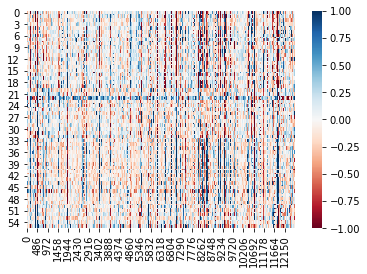

In [6]:
Lung_Cancer_data = np.loadtxt('./data/LungCancerData.txt')
X_Lung = Lung_Cancer_data.T

sns.heatmap(X_Lung, vmin=-1, vmax=1, cmap = 'RdBu')
pass

In [ ]:
result_Lung = SSVD_single(X_Lung)
u, s, v, i = result_Lung

As suggested in Lee et al. (2010), we unselected 5000 genes in the white area. Then we rescaled the data to a $[-1, 1]$ interval for better visualization. 

In [ ]:
Lung_SSVD = s * u.reshape((-1, 1)) @ np.sort(np.abs(v))[5000:].reshape((1, -1))
sns.heatmap(Lung_SSVD, vmin=-1, vmax=1, cmap = 'RdBu')
pass

Note that the original gene data has four subjects. In other words, the genes are supposed to be grouped in 4 clusters. In our plot, we can observe that our gene data are grouped in 4 clusters at subjects #20, #30 and #51. Thus, the rank-1 SSVD by our algorithm is indeed useful in this dataset. We then proceed to the second layer of SSVD. 

In [ ]:
result_Lung2 = SSVD(X_Lung - s * u.reshape((-1, 1)) @ v.reshape((1, -1)))
u2, s2, v2, i2 = result_Lung2

In [ ]:
Lung_SSVD2 = s2 * u2.reshape((-1, 1)) @ np.sort(np.abs(v2))[5000:].reshape((1, -1))
sns.heatmap(Lung_SSVD2, vmin=-1, vmax=1, cmap = 'RdBu')
pass

In the heatmap of the second layer, we can notice that the number of genes used to cluster data is less than of from the first layer. Also, we can notice that the difference between the seond and the third cluster, though not very clear in the first layer, is obvious in this layer as they are different in signs. 

In [ ]:
result_Lung3 = SSVD(X_Lung - s * u.reshape((-1, 1)) @ v.reshape((1, -1)) -
                     s2 * u2.reshape((-1, 1)) @ v2.reshape((1, -1)))
u3, s3, v3, i3 = result_Lung3

In [ ]:
Lung_SSVD3 = s3 * u3.reshape((-1, 1)) @ np.sort(np.abs(v3))[5000:].reshape((1, -1))
sns.heatmap(Lung_SSVD3, vmin=-1, vmax=1, cmap = 'RdBu')
pass

At layer 3, we can notice that the number of genes used to cluster data is significantly less than that of the first two layers. We can also observe that in this layer, only the last group are being clearly clustered by our algorithm, while the first two groups are blur in our graph. 

Another dataset from other sources we want to use is used in a proof-of-concept study published in 1999 by Golub et al. Essentially, there are two underlying clusters in the gene data. Similarly, we want our SSVD algorithm to locate these two clusters. Below are a snapshot of our data, and a heatmap of the raw data before clustering. 

In [ ]:
gene_expr = pd.read_csv('./data/GolubGeneExpression.csv', sep=',', index_col=0, header=0)
gene_expr.head()

In [ ]:
x_gene = np.array(gene_expr)
sns.heatmap(x_gene, vmin=-1, vmax=1, cmap = 'RdBu')
pass

In [ ]:
result_Gene = SSVD(x_gene)
u, s, v, i = result_Gene

In [ ]:
Gene_SSVD = s * u.reshape((-1, 1)) @ np.sort(np.abs(v)).reshape((1, -1))
sns.heatmap(Gene_SSVD, vmin=-1, vmax=1, cmap = 'coolwarm')
pass

In the originial dataset, the first 27 genes and the last 8 genes belong to two different groups. In our heatmap, we can roughly see a clustering effect around gene #28, where the color underneath that has a warmer color. However, we should also notive that the warm color appears at other genes, indicating that the algorithm fails to correctly indentify those genes. 

## Comparative analysis with competing algorithms

In the comparative analysis, we want to compare the bicluster performance in terms of accuracy between our SSVD algorithm and some similar models: the standard SVD method and the Sparse Principle Component Analysis (SPCA). The statistics we choose in the analysis are suggested by Lee et al. and are the same in the simulation section: number of zero entries, number of correctly specified zero entries, number of correctly specified nonzero entries and the misclasscification rate. 

In [ ]:
u_tilde = np.concatenate((np.arange(3, 11)[::-1],
                      np.ones(17) * 2,
                      np.zeros(75)))
u = u_tilde / np.linalg.norm(u_tilde)
v_tilde = np.concatenate((np.array([10, -10, 8, -8, 5, -5]), 
                          np.ones(5) * 3,
                          np.ones(5) * (-3), 
                          np.zeros(34)))
v = v_tilde / np.linalg.norm(v_tilde)
s = 50
x_sim = s * u.reshape((-1, 1)) @ v.reshape((1, -1)) 


In [ ]:
def num_zeros(approx): 
    
    return np.sum(approx == 0)

def num_crct_zeros(approx, orig):
    
    ind = np.where(approx == 0)
    return np.sum(orig[ind] == 0)

def num_crct_nzeros(approx, orig):
    
    ind = np.where(approx != 0)    
    return np.sum(orig[ind] != 0)

In [ ]:
def all_approx(M = 100):
    
    
    u_tilde = np.concatenate((np.arange(3, 11)[::-1],
                      np.ones(17) * 2,
                      np.zeros(75)))
    u = u_tilde / np.linalg.norm(u_tilde)
    v_tilde = np.concatenate((np.array([10, -10, 8, -8, 5, -5]), 
                              np.ones(5) * 3,
                              np.ones(5) * (-3), 
                              np.zeros(34)))
    v = v_tilde / np.linalg.norm(v_tilde)
    s = 50
    x_sim = s * u.reshape((-1, 1)) @ v.reshape((1, -1)) 
    
    zeros = np.zeros((M, 6))
    crct_zeros = np.zeros((M, 6))
    crct_nzeros = np.zeros((M, 6))
    n_all = np.concatenate((np.ones(3) * 100, np.ones(3) * 50))
    
    for i in range(M):
        noise = np.random.normal(size = x_sim.shape)
        ssvd_u, ssvd_s, ssvd_v, ssvd_i = SSVD(x_sim + noise)
        svd_u, svd_s, svd_v = la.svd(x_sim + noise)
        svd_u = svd_u[:, 0]
        svd_v = svd_v[0, :]
        spca_model = SparsePCA(n_components=1)
        spca_model.fit(x_sim + noise)
        spca_v = spca_model.components_[0]
        spca_model.fit((x_sim + noise).T)
        spca_u = spca_model.components_[0]
        
        list_of_approx_u = [ssvd_u, svd_u, spca_u]
        list_of_approx_v = [ssvd_v, svd_v, spca_v]
        
        zeros[i, :] = np.array(list(map(num_zeros, list_of_approx_u + list_of_approx_v)))
        crct_zeros[i, :] = np.array(list(map(num_crct_zeros, list_of_approx_u, [u] * 3)) + 
                                       list(map(num_crct_zeros, list_of_approx_v, [v] * 3)))
        crct_nzeros[i, :] = np.array(list(map(num_crct_nzeros, list_of_approx_u, [u] * 3)) + 
                                       list(map(num_crct_nzeros, list_of_approx_v, [v] * 3)))
 

    return np.array([np.mean(zeros, axis = 0), 
                   np.mean(crct_zeros, axis = 0), 
                   np.mean(crct_zeros, axis = 0) / np.mean(zeros, axis = 0), 
                   np.mean(crct_nzeros, axis = 0), 
                   np.mean(crct_nzeros, axis = 0) / (n_all - np.mean(zeros, axis = 0)), 
                   ((np.mean(zeros, axis = 0) - np.mean(crct_zeros, axis = 0)) +
                    (n_all - np.mean(zeros, axis = 0) - np.mean(crct_nzeros, axis = 0))) / n_all
                    ])


In [ ]:
result = all_approx()
result

## Discussion/conclusion

## Reference

Lee, M., Shen, H., Huang, J., and Marron, J. (2010). Biclustering via sparse singular value decomposition. Biometrics 66, 1087-1095.

Zou, H. (2006). The adaptive lasso and its oracle properties. Journal of the American Statistical Association 101, 1418-1429.